In [4]:
import idx2numpy
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
import random
from collections import defaultdict

In [5]:
X_train = idx2numpy.convert_from_file('./train-images-idx3-ubyte')
Y_train = idx2numpy.convert_from_file('./train-labels-idx1-ubyte')
print(X_train.shape)
print(Y_train.shape)

X_test = idx2numpy.convert_from_file('./t10k-images-idx3-ubyte')
Y_test = idx2numpy.convert_from_file('./t10k-labels-idx1-ubyte')
print(X_test.shape)
print(Y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [6]:
X_train = X_train.reshape(60000, 28*28)
X_test = X_test.reshape(10000, 28*28)

# Using entire Training Set

In [7]:
nn_classifier = KNeighborsClassifier(n_neighbors=1)
nn_classifier.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=1)

In [8]:
def compute_accuracy(preds, ys):
    correct = [pred == y for pred,y in zip(preds, ys)]
    return sum(correct)/len(correct)

In [9]:
test_preds = nn_classifier.predict(X_test)
print("Test Accuracy: " , compute_accuracy(test_preds, Y_test))

Test Accuracy:  0.9691


# Random Prototype Selection

In [10]:
def random_prototype_selection(train_images, train_labels, M=1000):
    sample_indices = random.sample(range(len(train_images)), M)
    sample_images = train_images[sample_indices]
    sample_labels = train_labels[sample_indices]
    return sample_images, sample_labels

In [11]:
import math

In [12]:
def perform_experiment(train_images, train_labels, M=1000):
    accuracies = []
    for i in range(10):
        X_train_M, Y_train_M = random_prototype_selection(X_train, Y_train, M)
        nn_M = KNeighborsClassifier(n_neighbors=1)
        nn_M.fit(X_train_M, Y_train_M)
        test_preds = nn_M.predict(X_test)
        acc = compute_accuracy(test_preds, Y_test)
        accuracies.append(acc)
    mean = sum(accuracies)/len(accuracies)
    std_dev = math.sqrt(sum([(acc - mean)**2 for acc in accuracies])
                        /(len(accuracies)))
    ci = 1.96*std_dev/math.sqrt(len(accuracies))
    return mean, ci

# Prototype Selection Algorithm

In [13]:
def compute_distance(a,b):
    return np.linalg.norm(a-b)

In [14]:
def prototype_selection(train_images, train_labels, M):
    average_dict = {}
    label_image_dict = defaultdict(list)
    for j in range(len(train_images)):
        label = train_labels[j]
        label_image_dict[label].append(train_images[j])
        
    for label in label_image_dict:
        average_dict[label] = np.average(label_image_dict[label], axis=0)
    
    distances = []
    for j in range(len(train_images)):
        label = train_labels[j]
        average = average_dict[label]
        dist = compute_distance(average, train_images[j])
        distances.append(dist)
    
    sorted_indices = np.array(distances).argsort()
    sorted_distances = np.array(distances)[sorted_indices]
    sorted_images = train_images[sorted_indices]
    sorted_labels = train_labels[sorted_indices]
    for i in range(len(sorted_distances)):
        if sorted_labels[i] == 0:
            print(sorted_distances[i])
    
    cnt_per_class = defaultdict(int)
    total_cnt = 0
    return_images = []
    return_labels = []
    for i in sorted_indices:
        label = sorted_labels[i]
        if cnt_per_class[label] < M//10:
            return_images.append(sorted_images[i])
            return_labels.append(sorted_labels[i])
            cnt_per_class[label] += 1
            total_cnt+=1
        if total_cnt == M:
            break
    
    return return_images, return_labels

# Accuracy Comparison

In [15]:
import matplotlib.pyplot as plt

In [16]:
M_values = [10,20,50,100,200,500,1000,2000,5000,10000,20000]
accuracies = []
random_accuracies=[]
confidence_intervals = []
for M in M_values:
    new_X_train, new_Y_train = prototype_selection(X_train, Y_train, M)
    nn_prototyped = KNeighborsClassifier(n_neighbors=1)
    nn_prototyped.fit(new_X_train, new_Y_train)
    test_preds = nn_prototyped.predict(X_test)
    accuracy_on_M = compute_accuracy(test_preds, Y_test)
    rand_acc, ci = perform_experiment(X_train, Y_train, M)
    accuracies.append(accuracy_on_M)
    confidence_intervals.append(ci)
    random_accuracies.append(rand_acc)

1286.7939023237684
1294.757561882686
1300.2210036446945
1303.181989344961
1312.2630707721814
1316.0351154737266
1318.0614436137018
1319.4037847936336
1324.154088342648
1324.8608861264524
1326.2274903300338
1326.6644072529982
1328.8152189356583
1330.9921695987045
1335.1904677662926
1335.5532812841284
1336.6298675045039
1339.6335127095515
1340.3678440348756
1342.8207199548103
1343.3734484697138
1344.9666026030416
1345.0529499466236
1345.4950694715947
1345.6906207861878
1348.3214106470725
1349.5565134212936
1350.164389427273
1350.3205035484295
1351.101498730604
1351.2343557592399
1353.29915787597
1353.4947598858241
1353.685334874962
1354.6867009676262
1355.391821917389
1357.0697558237728
1357.1011992744504
1357.243049268193
1357.6932267244163
1359.5117945315003
1359.720235649192
1360.7986446365603
1363.2227710547756
1365.1874888923453
1368.1530239022327
1368.454146538044
1369.078271648031
1370.1425311507314
1370.2065280949544
1372.549328191456
1373.320093872287
1374.6846371561064
1375.135

1627.4126772747934
1627.4252617701695
1627.530355668587
1627.7256247004568
1627.825954468699
1627.8532996631182
1628.0355146758357
1628.3463191649364
1628.5790602233592
1628.62060613081
1628.675069099457
1628.7304932438055
1628.8234632993083
1629.0026173929132
1629.2587106867134
1629.590935103902
1629.7098089822264
1629.7373542588637
1629.9532279418718
1629.9832583369105
1630.0022969204538
1630.0030146164388
1630.0048362515172
1630.2192210347537
1630.2281340577772
1630.2422582967572
1630.3344968252586
1630.568227570223
1630.707262859811
1630.7421005846818
1630.8072599065042
1630.8427419068896
1630.842986744028
1631.0197387479523
1631.2533221473527
1631.2605331771895
1631.2960248793474
1631.312728035536
1631.4679505015781
1631.5750133994895
1631.6289682479048
1631.631900115541
1631.643328285382
1631.7457180903593
1632.03424442708
1632.0569381211396
1632.34848876074
1632.4411605634461
1632.619446576447
1632.6354179999205
1632.6886327687334
1632.6935112491947
1632.9699469313618
1632.97528

1769.1309025335668
1769.1707915731565
1769.3106188714817
1769.381346932669
1769.590450553913
1769.9608908088335
1770.0992243636847
1770.1285930399936
1770.130850853804
1770.2410174050456
1770.3111573938934
1770.4526329771702
1770.4905336474772
1770.6316676501706
1770.7092382773467
1770.7420998555865
1770.7616195746093
1770.7616841708818
1770.8477249338289
1771.0576039966572
1771.1060526429003
1771.1519486654004
1771.1663470650008
1771.282847186711
1771.3832674207806
1771.4180084417778
1771.4388611812096
1771.537717175022
1771.8583760794932
1772.1317871274564
1772.191252687008
1772.2287048163314
1772.234290927304
1772.31457566874
1772.322458636367
1772.3309230875473
1772.4725805104993
1772.5547204277634
1772.5973430938184
1772.6034545629607
1772.617599440086
1772.6739665251116
1772.8196199081024
1772.8928684827692
1773.0599306035297
1773.0872401469987
1773.1432115297443
1773.1438655275274
1773.1495130742378
1773.3253543258334
1773.3262096196088
1773.39343945619
1773.398803978045
1773.49

1919.660995955431
1919.6658257880079
1919.741603387162
1919.9083523478982
1920.0726466635845
1920.2107079153843
1920.2156253445555
1920.2491089497948
1920.3564348694526
1920.4519259545327
1920.469390565317
1921.031912501883
1921.0398772272815
1921.0487652066342
1921.084260203162
1921.1508970077032
1921.2096258635108
1921.387749926735
1921.4046978806182
1921.4201067470674
1921.5474511867535
1921.5868436021935
1921.6268615173462
1921.6946183028774
1921.6979113373548
1921.7858088570874
1921.934647299262
1921.943250651282
1922.0594776245384
1922.2023265693194
1922.2906367454575
1922.4420852218068
1922.4564061378123
1922.5497540196802
1922.662433861141
1922.7000311091888
1922.8635014259457
1922.9802594429789
1923.1836626210736
1923.1983265765066
1923.2637628888706
1923.3134050023195
1923.4126748082674
1923.4477946061972
1923.6053138700972
1923.7428762516963
1923.9010637925896
1923.9103088814595
1923.9457355089062
1924.233415962206
1924.611070481255
1924.650493045935
1924.8672900889094
1924.

2389.0686356137194
2398.6249348580886
2405.3770822234283
2406.1361641202716
2409.912563511825
2412.053905055858
2415.01272151562
2415.7890939644058
2416.123537726572
2420.1692264083977
2424.767879786899
2433.097681261741
2433.739026345604
2437.6370279357125
2449.0557351335856
2456.0888632830024
2456.6719971829284
2459.5652531933188
2469.1936382281588
2472.5493148444434
2475.006424262135
2479.9004402095943
2484.1808759734354
2486.4767337329536
2487.8779691402683
2487.957631769762
2489.1259655006183
2508.512434190294
2536.754039802417
2549.3301579300687
2556.471212593162
2564.8879150136777
2621.732278411114
2819.601368688256
1286.7939023237684
1294.757561882686
1300.2210036446945
1303.181989344961
1312.2630707721814
1316.0351154737266
1318.0614436137018
1319.4037847936336
1324.154088342648
1324.8608861264524
1326.2274903300338
1326.6644072529982
1328.8152189356583
1330.9921695987045
1335.1904677662926
1335.5532812841284
1336.6298675045039
1339.6335127095515
1340.3678440348756
1342.820719

1635.0572073949133
1635.083755941936
1635.0848208279908
1635.2850787378293
1635.2984536843358
1635.6456593596288
1636.1130281333503
1636.1769430274157
1636.1889476358629
1636.4492522001917
1636.450240212619
1636.7084990388462
1636.8022560972797
1636.9561883023835
1637.0374071576025
1637.2329841452565
1637.2824372121945
1637.3490002060746
1637.5724893305692
1637.6109912326046
1637.7729900939473
1637.8433664932745
1638.0026372833308
1638.1336270941097
1638.213955885454
1638.32215984727
1638.4098235775239
1638.5292479664163
1638.6285128764262
1638.6323669883614
1638.6340181958817
1638.7238663207902
1638.974755881681
1639.004121847713
1639.0477845642006
1639.2034581604069
1639.3013684401365
1639.4353532846567
1639.4601047665396
1639.7313829741674
1639.7445781226886
1639.7540026783709
1640.1163708657461
1640.1244853895273
1640.2930615420817
1640.2943516508863
1640.315036277415
1640.338197660808
1640.3717971316685
1640.4514522788745
1640.492589144095
1640.50400786921
1640.5217628655982
1640.

1775.3529374591174
1775.5390530649263
1775.5419248782127
1775.5909316942627
1775.6469988709518
1775.7778429075895
1775.8344313136838
1775.9372555863463
1776.001755363316
1776.1128270206643
1776.3499623647474
1776.7871267279852
1776.8667651138405
1776.9018751900978
1776.9291067315776
1776.9450401010777
1777.0131536674112
1777.5191619595187
1777.5809960178299
1777.5946869907343
1777.6072222152395
1777.6232194571658
1777.773529105201
1778.0319291226554
1778.036591368944
1778.050585488366
1778.113550588987
1778.1271167323446
1778.1893920407615
1778.1965719494333
1778.2624199983102
1778.3642782624595
1778.4126550683625
1778.4593462690252
1778.648632766517
1778.7015911994904
1778.8461635323667
1778.8602981102445
1778.978901931441
1779.1362610618146
1779.156538899132
1779.1829298092212
1779.4003197027619
1779.4659355376948
1779.5316795963129
1779.628461160021
1779.6735539624583
1779.7250318886074
1779.911474588933
1779.969982229119
1780.0784531528634
1780.1253416110187
1780.2843500635702
1780

1928.5088473150104
1928.6437323934356
1928.656383274277
1928.7804015185814
1928.9793629310652
1929.030524734943
1929.059691044514
1929.273685293043
1929.5717119599035
1929.5901825347748
1929.7912163803016
1929.7919233260664
1930.293373834694
1930.3242613735479
1930.3589732733221
1930.474739612166
1930.4906373769054
1930.4937443868405
1930.556310875655
1930.6419922701336
1930.6659905363576
1930.671039267
1930.9315612189598
1931.119804809416
1931.191319911458
1932.2881837059947
1932.4054997337842
1932.8750506806007
1932.9959913705093
1933.0081463987565
1933.0447238690206
1933.1100053089986
1933.3028350392192
1933.3860233582325
1933.614996438674
1933.6244460248197
1933.8075248520636
1933.8105891221887
1933.8193345056593
1933.9108429403009
1933.9941721508928
1934.0316714136625
1934.0674129310144
1934.215268897525
1934.2307797869742
1934.3263891190832
1934.450788462628
1934.5198683629644
1934.6964935718283
1934.7748423436742
1935.2068883444972
1935.2629827222042
1935.352843917954
1935.72070

2096.641329958549
2096.6420885903603
2096.869850286311
2097.038416734394
2097.2161950394707
2097.257055549597
2097.3023506308205
2097.6748241665864
2097.712633431215
2097.874914539131
2098.434095925376
2098.65048725894
2098.8097854062335
2098.8796943857224
2098.9903051389792
2099.2905493136664
2099.8561776410706
2100.226558581234
2100.723987266633
2100.800850616119
2101.0645283180615
2101.67508296388
2101.9178659136105
2102.0221761780754
2102.282509397821
2102.3183467068634
2103.145461055895
2103.577757762143
2103.692203826094
2103.778140351968
2103.9375405679793
2104.030905234296
2104.6746698358834
2104.9579125190785
2105.74503273083
2105.786218785549
2106.8845656698822
2106.9742743191337
2107.704446061413
2107.705662945153
2107.718202337869
2108.2011195639125
2108.247958303952
2109.3359071778655
2110.255509470222
2110.4148383291863
2110.47773937678
2110.6424281725103
2110.6567203575937
2110.7204621151723
2111.0190960074183
2111.255609639814
2111.2760649326065
2111.3461438434165
2111.

KeyboardInterrupt: 

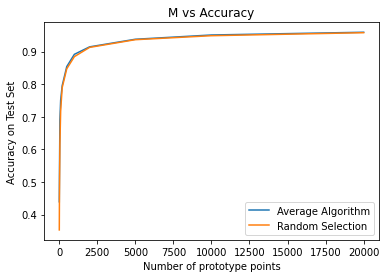

In [318]:
plt.plot(M_values, accuracies, label = 'Average Algorithm')
plt.plot(M_values, random_accuracies, label='Random Selection')
plt.legend()
plt.xlabel('Number of prototype points')
plt.ylabel('Accuracy on Test Set')
plt.title('M vs Accuracy')
plt.show()

In [319]:
print(random_accuracies, confidence_intervals)

[0.35307, 0.45481999999999995, 0.6168, 0.7181899999999999, 0.78936, 0.84708, 0.8843799999999999, 0.91275, 0.93635, 0.94858, 0.9578200000000001] [0.03033059374849097, 0.031875443301952675, 0.018833386966767295, 0.010108639907722494, 0.00825177225473412, 0.003967322756721454, 0.002228167447926651, 0.001054126557866742, 0.0014733282322686944, 0.0008392828939040839, 0.0006680121675538576]


In [320]:
print(accuracies)

[0.4393, 0.5186, 0.6909, 0.7511, 0.7955, 0.8539, 0.8915, 0.9144, 0.9377, 0.9508, 0.9592]
